In [274]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [275]:
df = pd.read_csv(r"F:\upgrad\lending case study\loan.csv")
print (df.shape)
df

(39717, 111)


F:\ anaconda python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
#removing columns that are fully null.

nulls = df.isnull().sum()
print("Number of fully null columns: ",nulls[nulls == 39717].count())
# 54 out of 111 have null vaulues.

to_drop = nulls[nulls==39717]
df=df.drop(columns=to_drop.index)
df.shape

Number of fully null columns:  54


(39717, 57)

In [277]:
# checking the % of null values in column after removing fully null columns.
a = df.isnull().sum()/len(df)*100 
a.sort_values(ascending = False).head(10)

#Observaton:
#From below analysis top 4 columns still have a large amount of null values and must be removed.

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
dtype: float64

In [278]:
#removing columns with high percentage of null values.
to_drop1 = a.sort_values(ascending = False)[:4]
df = df.drop(columns =to_drop1.index)

In [279]:
# finding unique values in each columns.
u = df.nunique() 
print(u[u==1])
#these columns have only one unique values and can be removed.

to_drop2 = u[u==1].index
df = df.drop(columns = to_drop2)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [280]:
#dropping columns thatl are not necessary.
to_drop3 = ['id','member_id','url','zip_code']
df.drop(columns = to_drop3,inplace=True)
df.shape

(39717, 40)

In [281]:
#removing null values
df = df.dropna()

UNIVARITE & SEGMENTED UNIVARIATE ANALYSIS

Quantitative Variables:

    1.Loan amount
    2.funded amount
    3.funded_amt_inv
    4.Interest Rate 
    5.Annual income 


count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

5000-10000     11887
0-5000          8521
10000-15000     7488
15000-20000     4294
20000-30000     3488
30000-35000      755
35000-40000        0
Name: loan_amt_range, dtype: int64


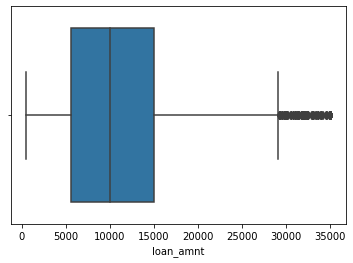

In [282]:
sns.boxplot(df['loan_amnt'])
print(df['loan_amnt'].describe())
print()
#Conclusion:---majority if the loan applicants applied for a loan amount between 5000 and 15000.---

# creating a new column for loan amount ranges to analyse against other variables.
bins = [0, 5000, 10000, 15000, 20000, 30000,35000, 40000]
rnge = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-35000',
       '35000-40000']
df['loan_amt_range'] = pd.cut(df['loan_amnt'], bins, labels = rnge)
print(df['loan_amt_range'].value_counts())

#observation:
#32.79 % loans were b/w 5000-10000.
#23.54 % loans were b/w 0-5000.
#20.59 % were b/w 10000-15000.

Conclusion:---Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.


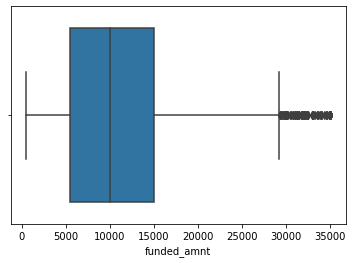

In [283]:
sns.boxplot(df['funded_amnt'])
df['funded_amnt'].describe()
print('Conclusion:---Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.')

In [284]:
#removing % sign from interest rate column, and converting datatype into float,in order to plot data.
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
df['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39551    10.91
39562    10.28
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 36433, dtype: float64

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

Conclusion:--interest rate on majority of loans were between 9.3% and 14.6%


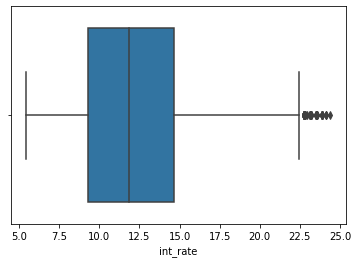

In [285]:
sns.boxplot(df['int_rate'])
print(df['int_rate'].describe())
print()
print('Conclusion:--interest rate on majority of loans were between 9.3% and 14.6%')

               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Current       1066.0  15.072880  3.556882  6.00  11.99  14.65  17.99  23.91
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11



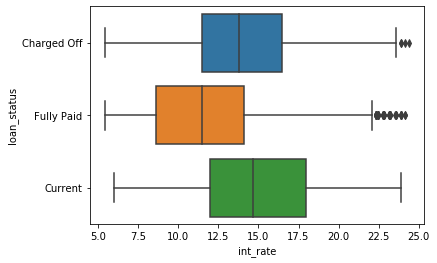

In [286]:
#comparing interest rates with laon status.
print(df.groupby(by='loan_status').int_rate.describe())
print()
sns.boxplot(x='int_rate',y='loan_status',data=df)


#Observation:
#defaulters have higher interest than fully paid customers.
# fully paid- 8.59 to 13.99 
# charged off- 11.48 to 16.45

In [287]:
# removing outliers from annual income
df = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)] 

count     36064.000000
mean      65910.824714
std       34439.924455
min        4000.000000
25%       41500.000000
50%       59779.505000
75%       81717.000000
max      228000.000000
Name: annual_inc, dtype: float64

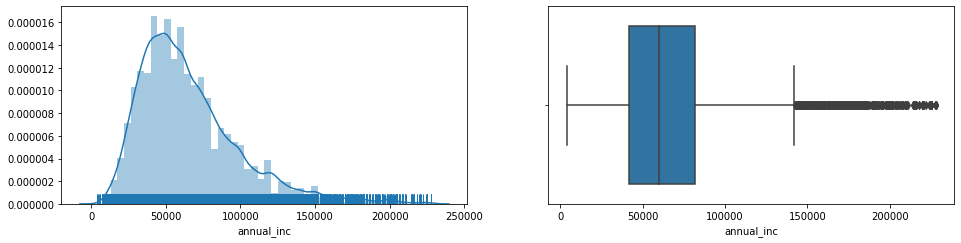

In [288]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['annual_inc'],rug=True)
plt.subplot(2,2,2)
sns.boxplot(df['annual_inc'])
df['annual_inc'].describe()

#Observations :
#Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000.

Unordered Categorical Variables are:

    1. loan_status
    2. home_ownership
    3. purpose
    4. addr_state

Fully Paid     30103
Charged Off     4908
Current         1053
Name: loan_status, dtype: int64

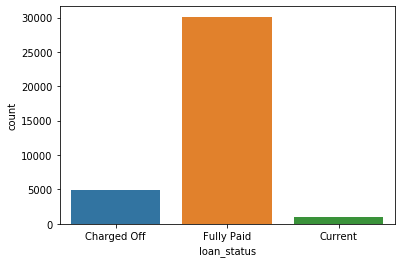

In [289]:
#Unordered Categorical Variable: loan_status
sns.countplot(df['loan_status'])
df['loan_status'].value_counts()

#Observation:
#14% loans were charged off out of total loan issued.

RENT        17381
MORTGAGE    16041
OWN          2550
OTHER          92
Name: home_ownership, dtype: int64

---loan_status and home ownership segmented analysis---
loan_status  home_ownership
Charged Off  RENT               2504
             MORTGAGE           2042
             OWN                 344
             OTHER                18
Current      MORTGAGE            588
             RENT                396
             OWN                  69
Fully Paid   RENT              14481
             MORTGAGE          13411
             OWN                2137
             OTHER                74
Name: home_ownership, dtype: int64


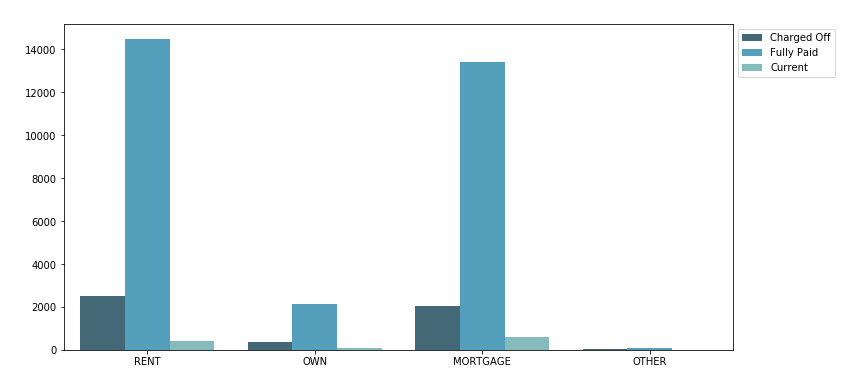

In [290]:
#Unordered Categorical Variable: home_ownership

print(df['home_ownership'].value_counts())
print()
print('---loan_status and home ownership segmented analysis---')

print(df.groupby(by='loan_status').home_ownership.value_counts())

plt.figure(figsize=(12,6))
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#Observation:
# rented home or mortgazed their home applicants have high charged off numbers,
# but this could be because of high number of applicants from these categories.

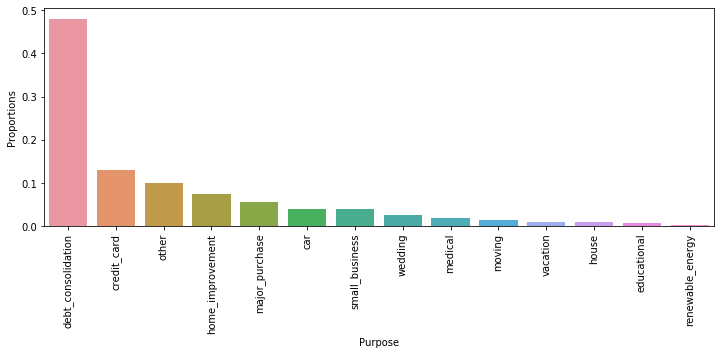

In [291]:
#Unordered Categorical Variable: purpose

plt.figure(figsize=(12,4))

p = df['purpose'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='purpose', data=p)
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportions')
plt.show()

#Observation:
#Looks line more number of people took loan for debt consolidation & paying credit card bill.

loan_status  purpose           
Charged Off  debt_consolidation     2496
             other                   543
             credit_card             474
             small_business          355
             home_improvement        289
             major_purchase          188
             car                     149
             medical                  95
             wedding                  82
             moving                   78
             house                    51
             vacation                 49
             educational              44
             renewable_energy         15
Current      debt_consolidation      553
             other                   112
             credit_card              99
             home_improvement         87
             small_business           63
             car                      48
             major_purchase           35
             wedding                  20
             house                    13
             medical     

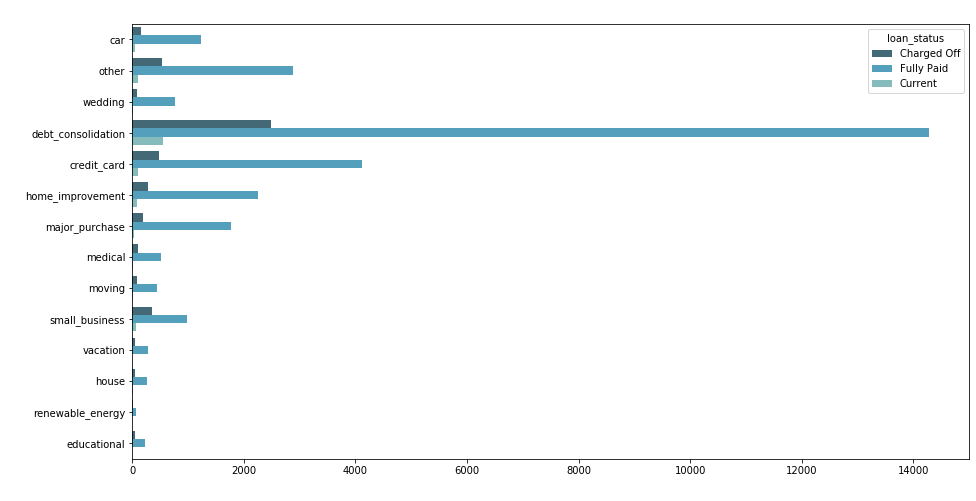

In [292]:
#analysis b/w loan status and home ownership.

print(df.groupby(by='loan_status').purpose.value_counts())
plt.figure(figsize=(15,8))
ax = sns.countplot(y="purpose",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#Obrservation:
#charged off count is higher too in debt consolidation & paying credit card bill categories.

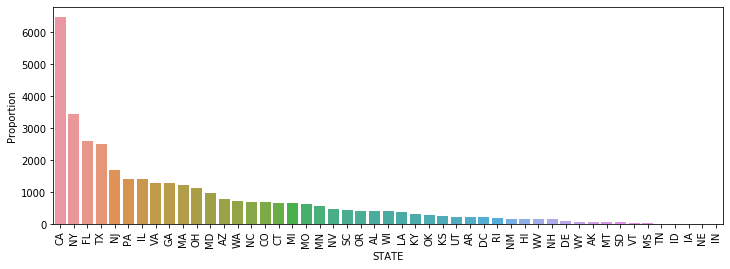

In [293]:
#Unordered Categorical Variable: addr_state
plt.figure(figsize=(12,4))

states = df['addr_state'].value_counts().reset_index()
sns.barplot(x ='index',y ='addr_state',data = states)
plt.xticks(rotation =90)
plt.ylabel('Proportion')
plt.xlabel('STATE')
plt.show()

#Observation:
#Most of the borrowers are from CA and NY

count    36064.000000
mean        13.504043
std          6.628427
min          0.000000
25%          8.440000
50%         13.610000
75%         18.730000
max         29.990000
Name: dti, dtype: float64


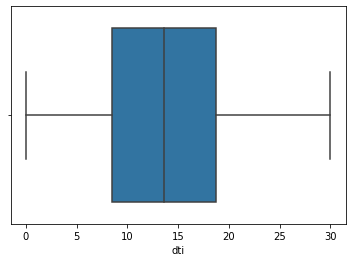

In [294]:
print(df['dti'].describe())
sns.boxplot(df['dti'])

#observation:
# debt to income ratio among participants is b/w 8.27 and 18.64.

Ordered Categorical Variables:

     1.issue_d
     2.Loan Paying Term
     3.grade
     4.sub-grade
     5.emp_length

In [295]:
# Derived Variable: creating month and year column from issue date.

m,y=df['issue_d'].str.split('-').str

F:\ anaconda python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [296]:
df['month']=m
df['year']=y

11    19959
10    10680
09     4371
08     1048
07        6
Name: year, dtype: int64


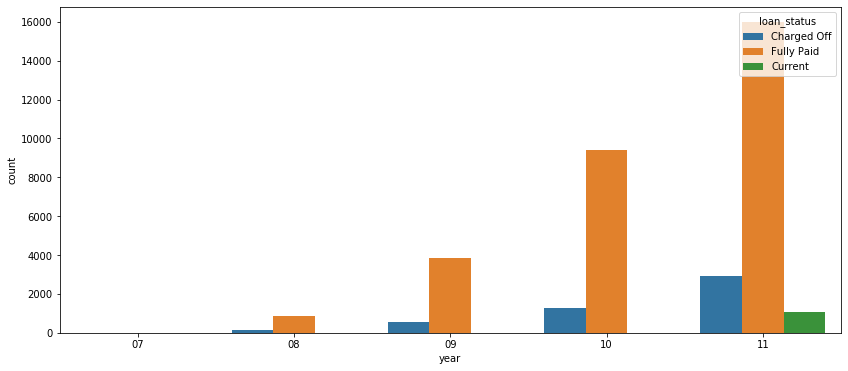

loan_status  year
Charged Off  11       2919
             10       1292
             09        536
             08        159
             07          2
Current      11       1053
Fully Paid   11      15987
             10       9388
             09       3835
             08        889
             07          4
Name: year, dtype: int64


In [297]:
# univariate analysis of loans by year.
print(df['year'].value_counts())
plt.figure(figsize=(14,6))
sns.countplot(data=df,hue='loan_status',x='year')
plt.show()
print(df.groupby(by='loan_status').year.value_counts())

#obsevation:
#charged off numbers are increasing every year, but this could be due to increase in loan applications every year.

Dec    3991
Nov    3789
Oct    3550
Sep    3384
Aug    3281
Jul    3202
Jun    3034
May    2787
Apr    2650
Mar    2371
Jan    2024
Feb    2001
Name: month, dtype: int64
loan_status  month
Charged Off  Dec       595
             Nov       515
             Oct       506
             Sep       494
             Jul       429
             Aug       426
             Jun       426
             May       419
             Apr       339
             Mar       286
             Jan       254
             Feb       219
Current      Dec       208
             Oct       157
             Sep       144
             Nov       142
             Aug       117
             Jul       115
             Jun        92
             May        74
             Apr         3
             Mar         1
Fully Paid   Dec      3188
             Nov      3132
             Oct      2887
             Sep      2746
             Aug      2738
             Jul      2658
             Jun      2516
             Apr      2308
 

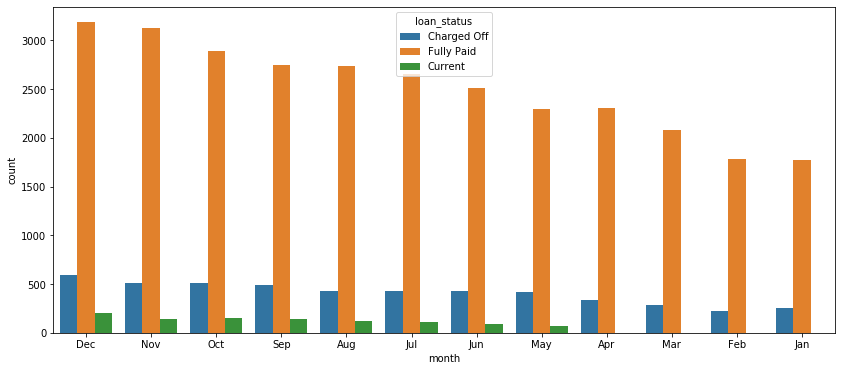

In [298]:
# univariate analysis of loans by month.
plt.figure(figsize=(14,6))
print(df['month'].value_counts())
sns.countplot(data=df,hue='loan_status',x='month')
print(df.groupby(by='loan_status').month.value_counts())

# charged off numbers are highest during last 2 months of year.

 36 months    26129
 60 months     9935
Name: term, dtype: int64

loan_status  term      
Charged Off   36 months     2710
              60 months     2198
Current       60 months     1053
Fully Paid    36 months    23419
              60 months     6684
Name: term, dtype: int64


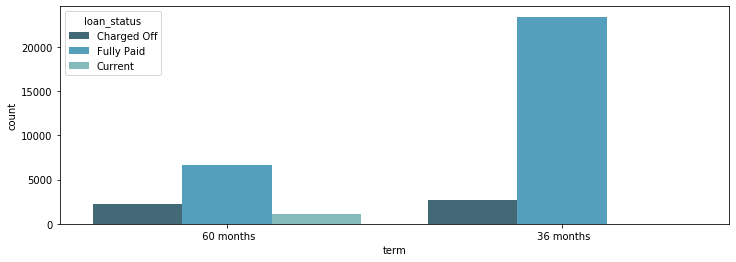

In [299]:
## univariate analysis of: term.
print(df['term'].value_counts())
print()
print(df.groupby(by='loan_status').term.value_counts())
# term with loan status
plt.figure(figsize=(12,4))
sns.countplot(data = df,x ='term',hue='loan_status',palette='GnBu_d')

#People who take 60 months to repay loan had higher % of getting charged off as compared to those who took 36 months.

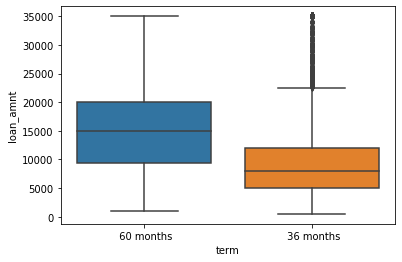

In [300]:
sns.boxplot(x='term', y=df['loan_amnt'], data=df)

#Observation:
#Higher amount loans have high tenure i.e 60 months

B    10948
A     9116
C     7353
D     4816
E     2596
F      947
G      288
Name: grade, dtype: int64


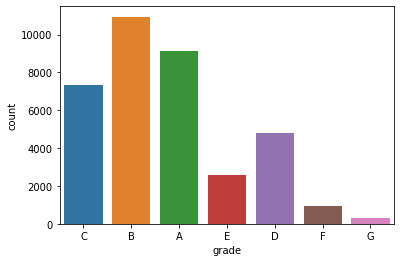

In [301]:
# univariate analysis of grade
#ordered Categorical Variable: grade
print(df['grade'].value_counts())
sns.countplot(df['grade'])


#Grade A and B had most number of people.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

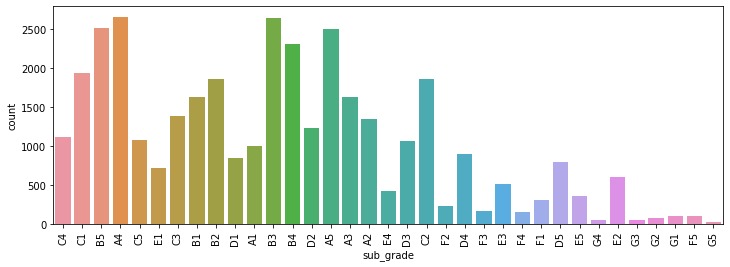

In [302]:
# univariate analysis of sub-grade
#ordered Categorical Variable: sub-grade
plt.figure(figsize=(12,4))
df['sub_grade'].value_counts()
sns.countplot(df['sub_grade'])
plt.xticks(rotation=90)
plt.show()



In [303]:
#ordered Categorical Variable: emp_length

#cleaning emp_length column for analysis: string manipulation.
df['emp_length']= df['emp_length'].str.rstrip('years')
df['emp_length']

1        < 1 
3        10+ 
4          1 
5          3 
6          8 
         ... 
39551      2 
39562      1 
39623      8 
39666      2 
39680      2 
Name: emp_length, Length: 36064, dtype: object

10+     8281
2       4136
< 1     4024
3       3879
4       3272
5       3103
1       2998
6       2100
7       1683
8       1390
9       1198
Name: emp_length, dtype: int64


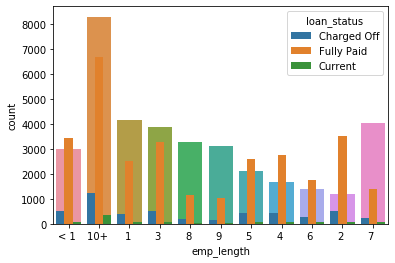

In [304]:
# univariate analysis of employment length.
sns.countplot(df['emp_length'].sort_values())
print(df['emp_length'].value_counts())

#comparing loan status with employment length.
sns.countplot(data = df,x ='emp_length',hue='loan_status')

#obsevation:
#people with highest employment lengths have higher % of charged off.

Not Verified       14982
Verified           11741
Source Verified     9341
Name: verification_status, dtype: int64

----Verification_Status compared with loan status---
loan_status  verification_status
Charged Off  Verified                1834
             Not Verified            1761
             Source Verified         1313
Current      Verified                 554
             Source Verified          283
             Not Verified             216
Fully Paid   Not Verified           13005
             Verified                9353
             Source Verified         7745
Name: verification_status, dtype: int64


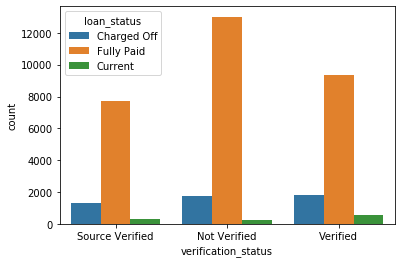

In [305]:
# univariate analysis of verification status.

print(df['verification_status'].value_counts())
print( )
print("----Verification_Status compared with loan status---")
print(df.groupby(by='loan_status').verification_status.value_counts())
sns.countplot(data=df,hue='loan_status',x='verification_status')


#we cannot blame non-verification for defaulters.
#verified applicants have more default % which means there could be a problem with verifiaction process.
#41.25% of loans given were not verified.

BIVARIATE ANALYSIS

In [306]:
#creating a groupby dataframe of important variables with loan status.
# calculating charged off proportion.
# plotting a barplot for some variable against charged off proportion.

def Chargedoff_Proportion(x):
    data=df.groupby([x, 'loan_status']).loan_status.count().unstack().reset_index().fillna(0)
    data['Total'] = data['Charged Off'] + data['Current'] + data['Fully Paid'] 
    data['Chargedoff_Proportion'] = data['Charged Off']/data['Total']
    plt.figure(figsize=(14,6))
    sns.barplot(data=data,x=x,y='Chargedoff_Proportion')
    plt.xticks(rotation=90)
    return data

loan_status,term,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,36 months,2710.0,0.0,23419.0,26129.0,0.103716
1,60 months,2198.0,1053.0,6684.0,9935.0,0.221238


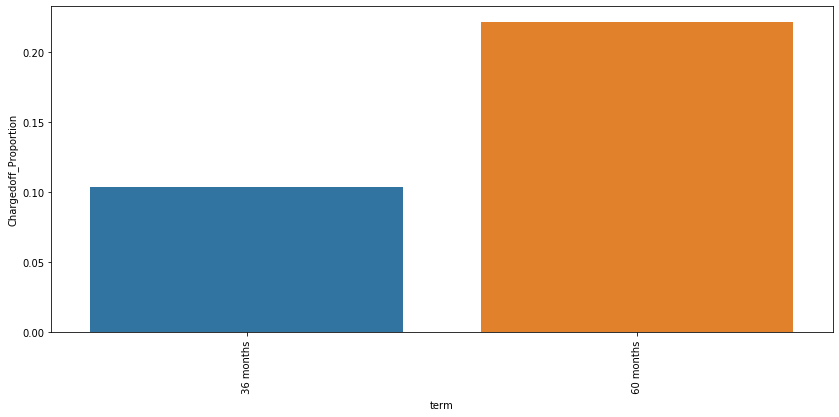

In [307]:
Chargedoff_Proportion('term')

#observation:
#long term loans have higher charged off proportion.

PURPOSE:

    1.Purpose vs Chargedoff_Proportion.
    2.loan amount vs Purpose

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,car,149.0,48.0,1239.0,1436.0,0.103760
1,credit_card,474.0,99.0,4112.0,4685.0,0.101174
2,debt_consolidation,2496.0,553.0,14286.0,17335.0,0.143986
3,educational,44.0,0.0,230.0,274.0,0.160584
4,home_improvement,289.0,87.0,2253.0,2629.0,0.109928
5,house,51.0,13.0,269.0,333.0,0.153153
6,major_purchase,188.0,35.0,1764.0,1987.0,0.094615
7,medical,95.0,12.0,520.0,627.0,0.151515
8,moving,78.0,6.0,439.0,523.0,0.149140
9,other,543.0,112.0,2887.0,3542.0,0.153303


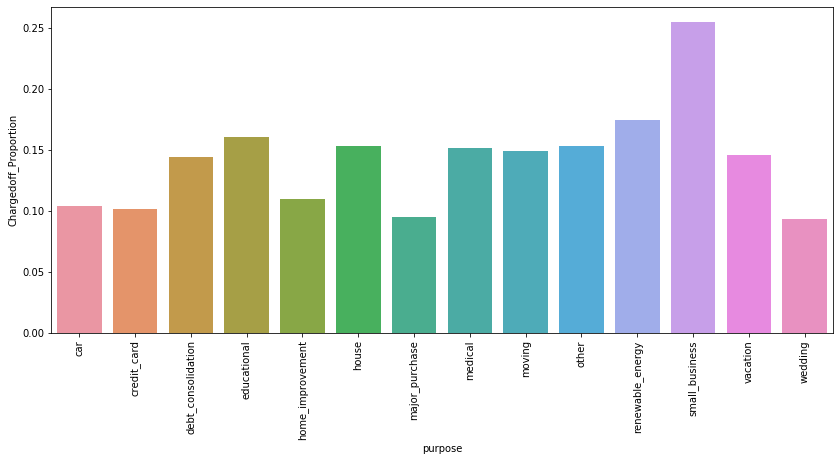

In [308]:
Chargedoff_Proportion('purpose')
# business loans have the highest charged off %.

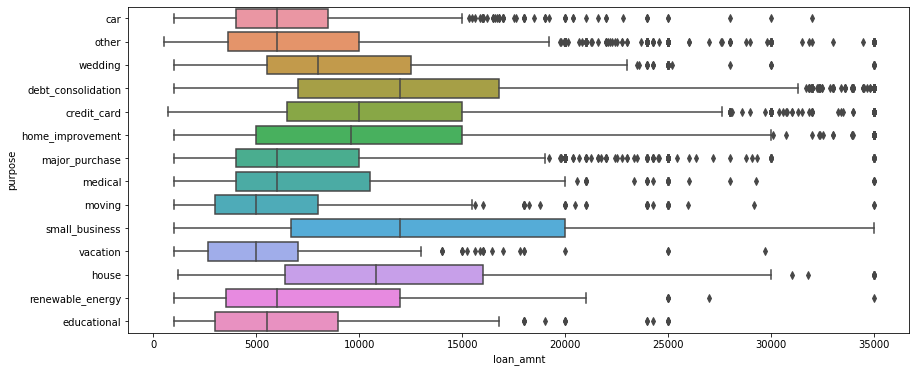

In [309]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='loan_amnt',y='purpose')

# credit card, small business, house , debt_consolidation were given higher amount of loans.

HOME OWNERSHIP

loan_status,home_ownership,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,MORTGAGE,2042.0,588.0,13411.0,16041.0,0.127299
1,OTHER,18.0,0.0,74.0,92.0,0.195652
2,OWN,344.0,69.0,2137.0,2550.0,0.134902
3,RENT,2504.0,396.0,14481.0,17381.0,0.144065


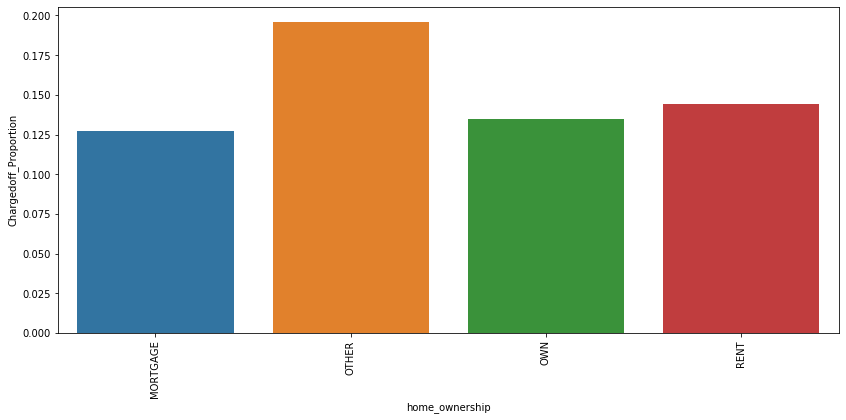

In [310]:
Chargedoff_Proportion('home_ownership')
#

INCOME VS LOAN STATUS

In [311]:
# CREATING BINS FOR ANNUAL INCOME COLUMN TO PLOT AGAINST LOAN STATUS.

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]
rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels = rng)


loan_status annual_inc_range  Charged Off  Current  Fully Paid  Total  \
0                    0-20000          162        5         716    883   
1                20000-40000         1304      153        6305   7762   
2                40000-60000         1555      316        8899  10770   
3                60000-80000          918      231        6245   7394   
4               80000-100000          474      165        3768   4407   
5              100000-120000          224       79        1943   2246   
6              120000-140000          124       38        1017   1179   
7              140000-160000           77       34         565    676   
8              160000-180000           32       21         318    371   
9              180000-200000           24        9         203    236   
10             200000-220000            9        2          93    104   
11             220000-240000            5        0          31     36   

loan_status  Chargedoff_Proportion  
0            

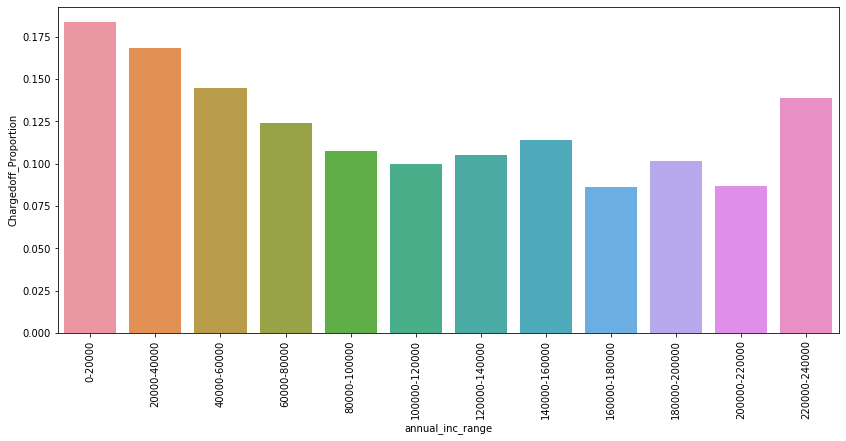

In [312]:
data=df.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().reset_index()
data['Total'] = data['Charged Off'] + data['Current'] + data['Fully Paid'] 
data['Chargedoff_Proportion'] = data['Charged Off']/data['Total']
plt.figure(figsize=(14,6))
sns.barplot(data=data,x='annual_inc_range',y='Chargedoff_Proportion')
plt.xticks(rotation=90)
print(data)

# Observations:
# Income range 100000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# But there are some irregularities for 220000+ income group where charged-off  is higher.

verification_status  annual_inc_range
Not Verified         40000-60000         4957
                     20000-40000         3920
                     60000-80000         2937
                     80000-100000        1508
                     100000-120000        654
                     0-20000              445
                     120000-140000        302
                     140000-160000        141
                     160000-180000         56
                     180000-200000         42
                     200000-220000         11
                     220000-240000          9
Source Verified      40000-60000         2867
                     20000-40000         2294
                     60000-80000         1769
                     80000-100000         992
                     100000-120000        487
                     0-20000              276
                     120000-140000        269
                     140000-160000        168
                     160000-180000        

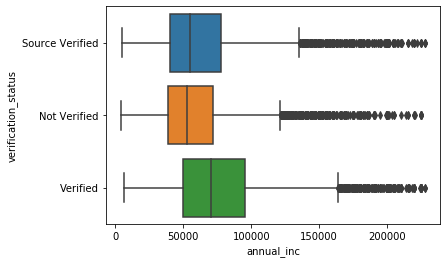

In [313]:
#annual income vs verification 
sns.boxplot(data=df,x='annual_inc',y='verification_status')
df.groupby(by='verification_status').annual_inc_range.value_counts()

#observation:
#higher income people have verified loans 

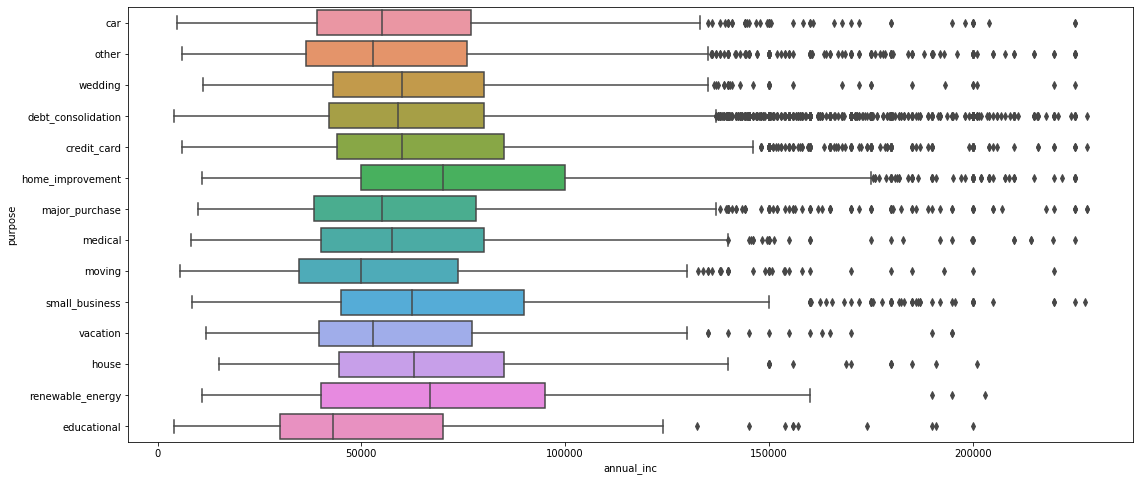

In [314]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df,y='purpose',x='annual_inc')

# higher income applicants take loans for renewable energy and home improvement.

GRADE:

    1. grade vs charged off percentage 
    2. grade vs interest rate 
    3. grade vs loan amount 
    4. grade vs annual income 
    5. grade vs dti 
    6. grade vs verification status.
    

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,A,513,35,8568,9116,0.056275
1,B,1247,316,9385,10948,0.113902
2,C,1165,248,5940,7353,0.158439
3,D,975,206,3635,4816,0.202450
4,E,637,167,1792,2596,0.245378
5,F,280,65,602,947,0.295671
6,G,91,16,181,288,0.315972


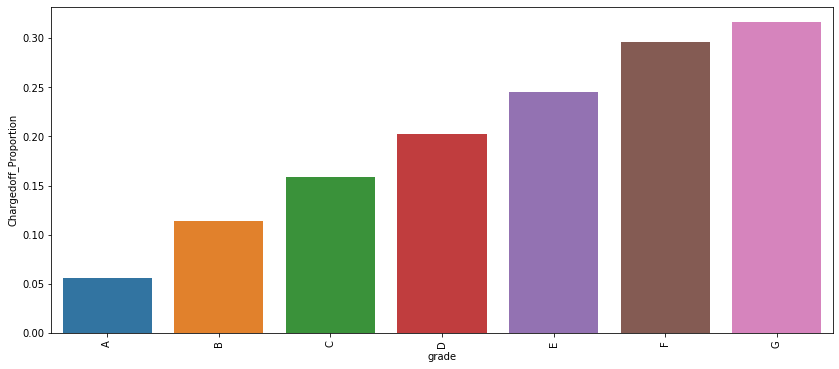

In [315]:
Chargedoff_Proportion('grade')

# Observations:
# Charged of is increasing with grade moving from "A" towards "G".

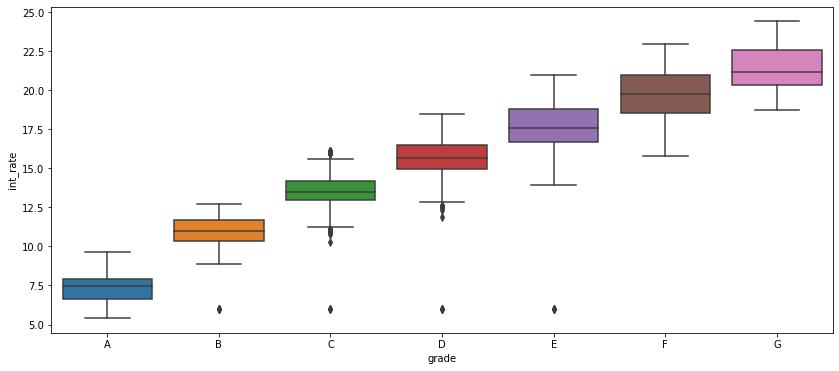

In [316]:
# grade vs interest rate 
plt.figure(figsize=(14,6))
sns.boxplot(x='grade',y='int_rate',data=df,order = 'ABCDEFG')

# Higher grades have higher interest rate ,maybe because they are given to people who are considered risky applicants.

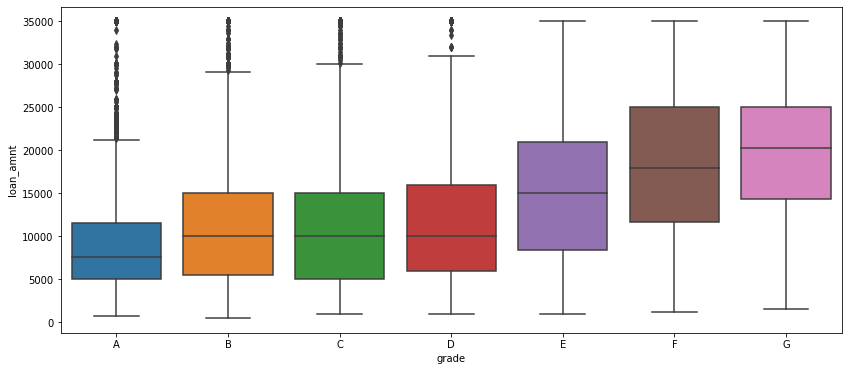

In [317]:
#grade vs loan amount
plt.figure(figsize=(14,6))
sns.boxplot(x='grade',y='loan_amnt',data=df,order = 'ABCDEFG')

# loan given at E ,F, G are higher , and therefore have higher interest rate as we saw above.

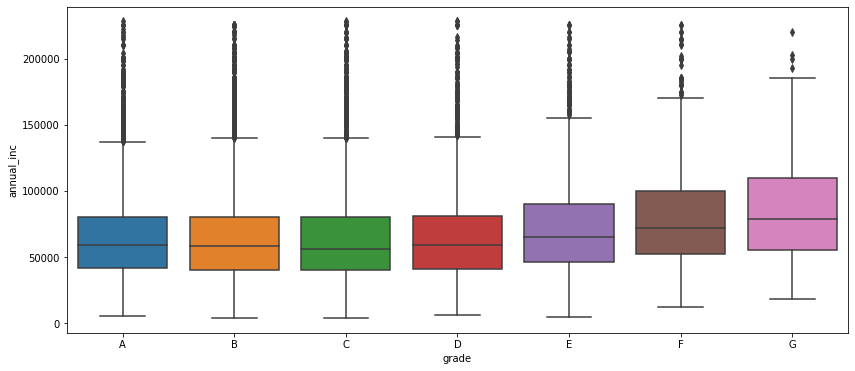

In [318]:
#grade vs annual_income
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='grade',y='annual_inc',order = 'ABCDEFG')

#higher income people have loans for high grades.

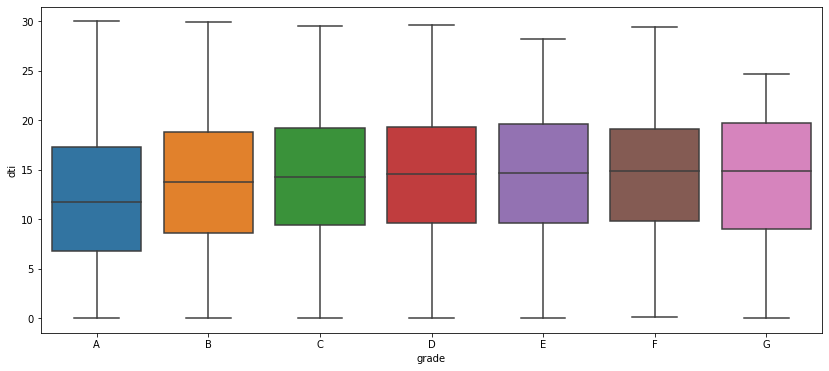

In [319]:
plt.figure(figsize=(14,6))
sns.boxplot(x='grade',y='dti',data=df,order = 'ABCDEFG')

# there's not much difference among grades in relation to debt to income ratio.

INTEREST RATE:

    1. IR vs charged off percentage 
    2. IR vs purpose
    3. year vs IR 
    4. dti vs IR 
    5. term vs IR 
    6. emp_length vs IR 
    7. IR  vs loan amoumt 

In [320]:
# creating bins for interest rate column.
bins = [0, 5, 10, 15, 20, 25,30]
rng = ['0-5', '5-10', '10-15', '15-20', '20-25','25-30']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels = rng)

loan_status int_rate_range  Charged Off  Current  Fully Paid  Total  \
0                      0-5            0        0           0      0   
1                     5-10          682       69       10344  11095   
2                    10-15         2345      488       14266  17099   
3                    15-20         1615      403        5057   7075   
4                    20-25          266       93         436    795   
5                    25-30            0        0           0      0   

loan_status  Chargedoff_Proportion  
0                              NaN  
1                         0.061469  
2                         0.137143  
3                         0.228269  
4                         0.334591  
5                              NaN  


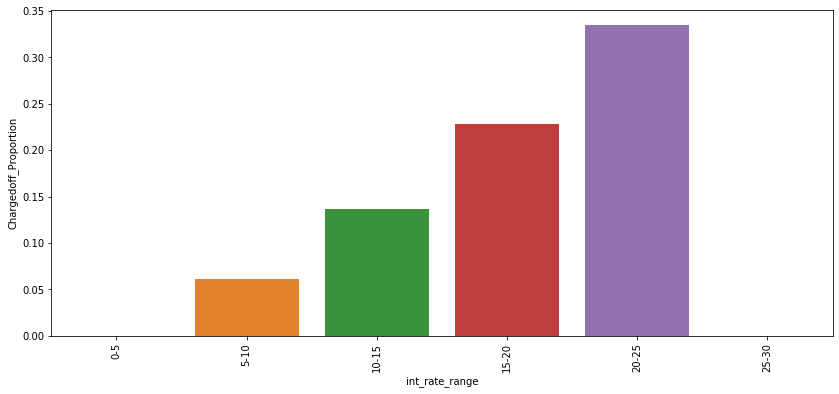

In [321]:
data=df.groupby(['int_rate_range', 'loan_status']).loan_status.count().unstack().reset_index()
data['Total'] = data['Charged Off'] + data['Current'] + data['Fully Paid'] 
data['Chargedoff_Proportion'] = data['Charged Off']/data['Total']
plt.figure(figsize=(14,6))
sns.barplot(data=data,x='int_rate_range',y='Chargedoff_Proportion')
plt.xticks(rotation=90)
print(data)

# higher interest rate have higher charged off %.

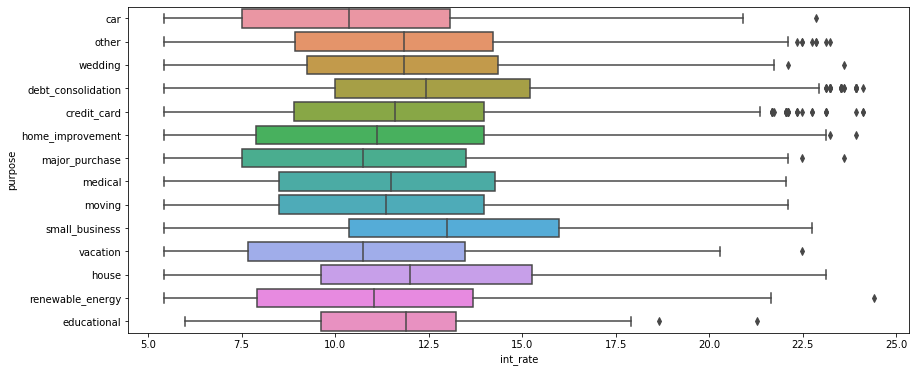

In [322]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='int_rate',y='purpose')   

# house , small business , debt consolidation have higher interest rates.

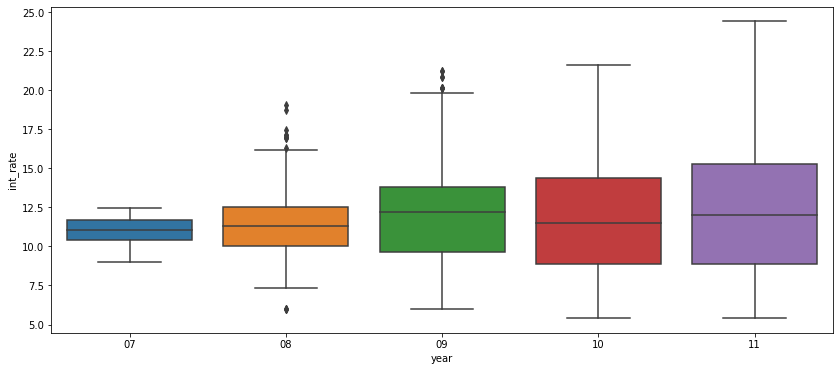

In [323]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='year',y='int_rate')

# Plot shows intrest rate is increasing slowly with increase in year.

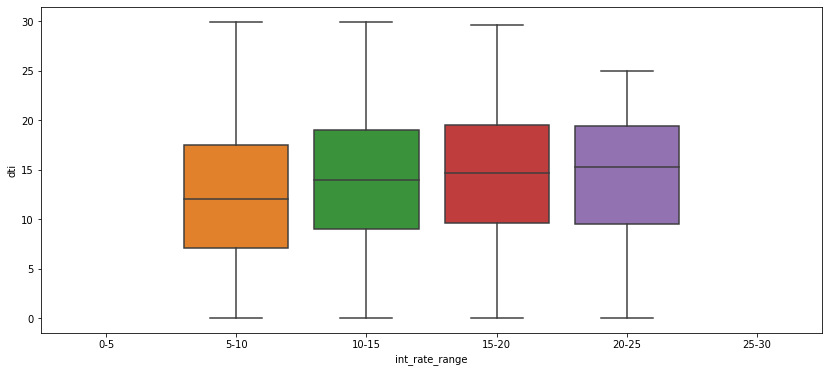

In [324]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,y='dti',x='int_rate_range')
#there is slight increase in interest rate with increase in DTI

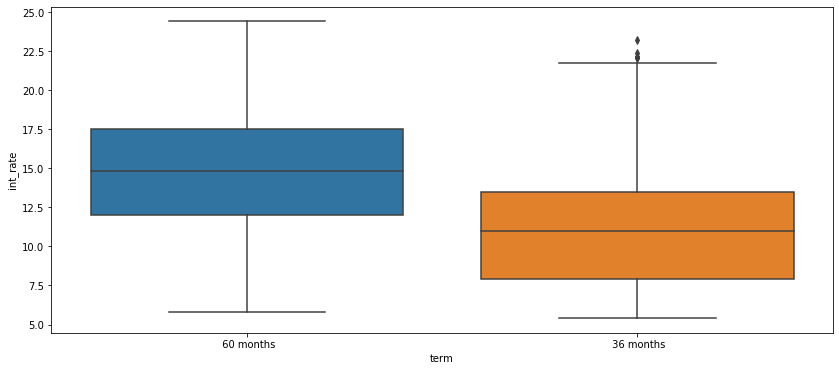

In [325]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='term',y='int_rate')

#avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

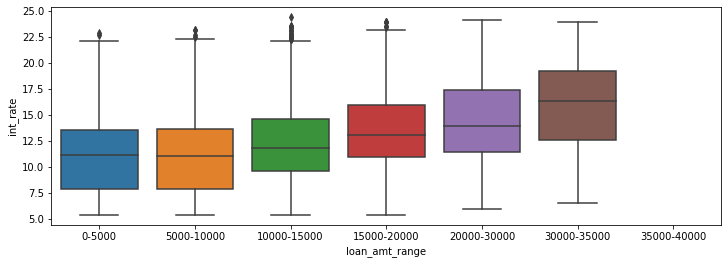

In [333]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,x='loan_amt_range',y='int_rate')

# bigger loans have higher intrest rates.

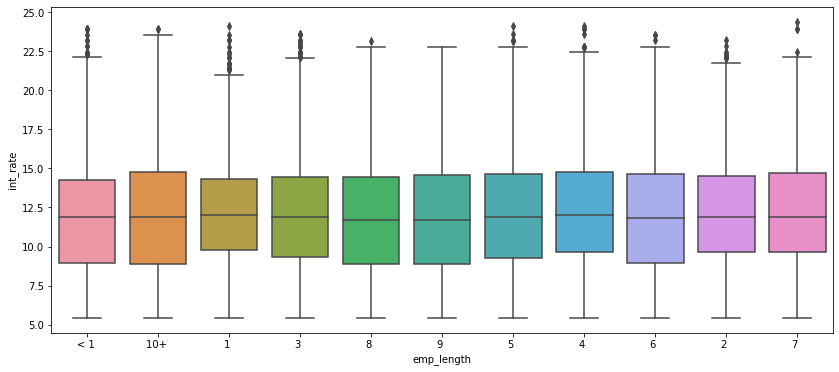

In [328]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='emp_length',y='int_rate')

Employee length

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,1,407,65,2526,2998,0.135757
1,10+,1221,375,6685,8281,0.147446
2,2,525,95,3516,4136,0.126934
3,3,517,80,3282,3879,0.133282
4,4,421,91,2760,3272,0.128667
5,5,420,85,2598,3103,0.135353
6,6,285,56,1759,2100,0.135714
7,7,247,59,1377,1683,0.146762
8,8,191,43,1156,1390,0.137410
9,9,146,31,1021,1198,0.121870


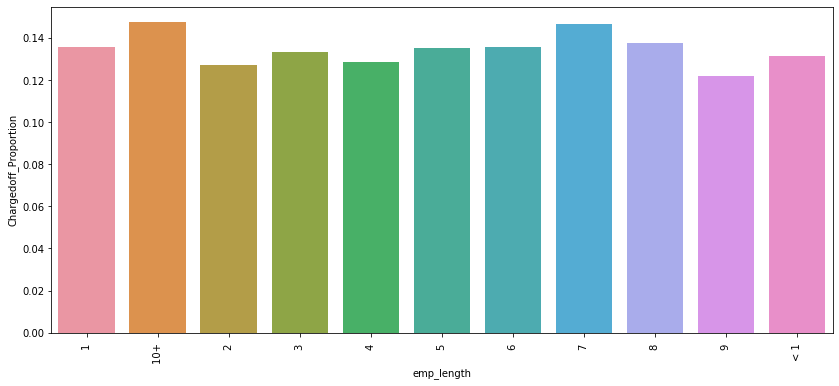

In [329]:
Chargedoff_Proportion('emp_length')

# there are no patters in this column.

STATES

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,AK,14.0,2.0,58.0,74.0,0.189189
1,AL,47.0,16.0,348.0,411.0,0.114355
2,AR,25.0,9.0,191.0,225.0,0.111111
3,AZ,105.0,25.0,645.0,775.0,0.135484
4,CA,966.0,139.0,5365.0,6470.0,0.149304
5,CO,79.0,25.0,592.0,696.0,0.113506
6,CT,78.0,23.0,561.0,662.0,0.117825
7,DC,14.0,3.0,189.0,206.0,0.067961
8,DE,11.0,1.0,94.0,106.0,0.103774
9,FL,433.0,81.0,2076.0,2590.0,0.167181


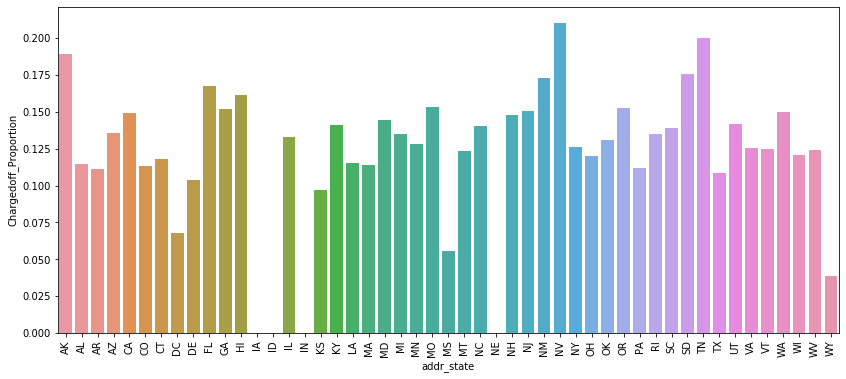

In [330]:
Chargedoff_Proportion('addr_state')

# NE has highest percentage of charged off. 